<a href="https://colab.research.google.com/github/nicolasViniegraa/porfolio/blob/main/linear_regression/human_brainweight_prediction/Human_Brain_weight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I've created a Linear Regresion model that predicts the weight of the brain in human patients. The dataset was obtained in kaggle.com <br>
https://www.kaggle.com/datasets/anubhabswain/brain-weight-in-humans

In [17]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Data Analysis

---



---



In [18]:
data = pd.read_csv('dataset.csv')

data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


We have the following attributes: <br>

Gender: 1 if patient is Male, 2 if it's Female <br>
Age Range: 1 represents >18 years of age , 2 represents <18 years of age <br>
Head Size: Head volume in cubic centimetres <br>
Brain Weight: Mass of brains in grams

In [5]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
data.shape

(237, 4)

In [19]:
#Rename columns
data = data.rename(columns={"Gender":"gender", "Age Range": "age_range", "Head Size(cm^3)": "head_size", "Brain Weight(grams)": "brain_weight"})

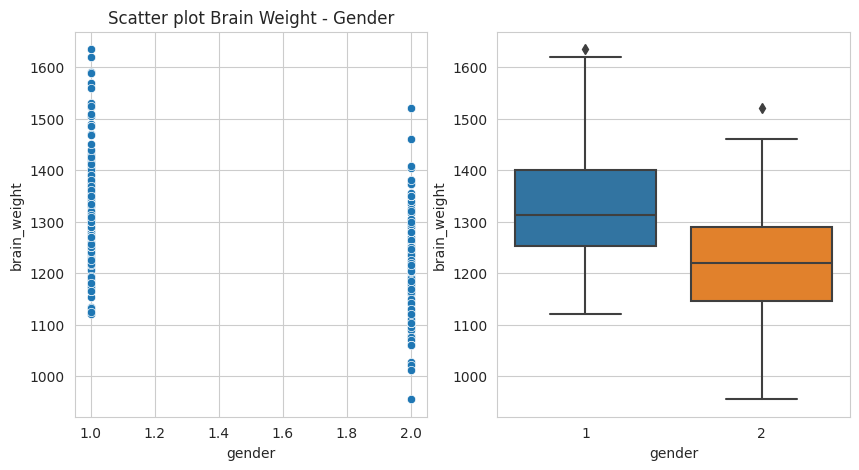

In [31]:
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['gender'], y=data['brain_weight'])
plt.xlabel('gender')
plt.ylabel('brain_weight')
plt.title('Scatter plot Brain Weight - Gender')
plt.subplot(1, 2, 2)
sns.boxplot(x=data['gender'],y=data['brain_weight'],data=data)
plt.show()

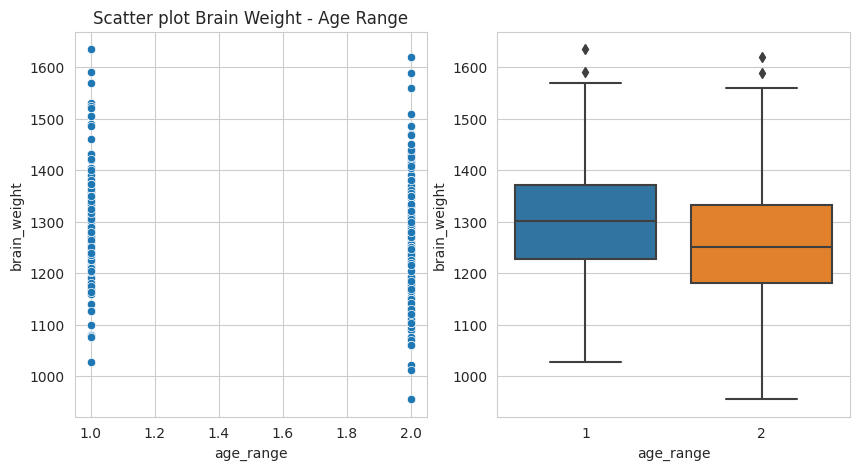

In [33]:
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['age_range'], y=data['brain_weight'])
plt.xlabel('age_range')
plt.ylabel('brain_weight')
plt.title('Scatter plot Brain Weight - Age Range')
plt.subplot(1, 2, 2)
sns.boxplot(x=data['age_range'],y=data['brain_weight'],data=data)
plt.show()

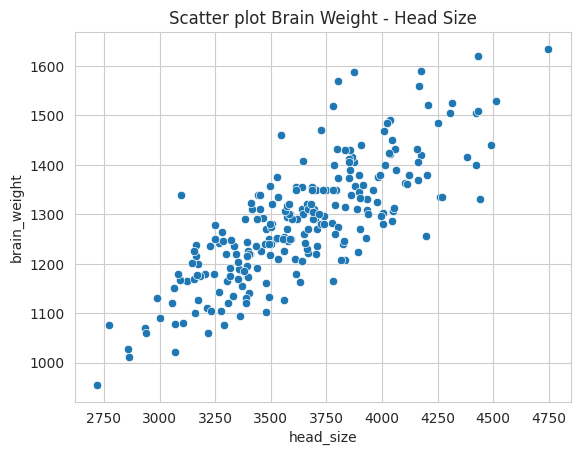

In [34]:
sns.scatterplot(x=data['head_size'], y=data['brain_weight'])
plt.xlabel('head_size')
plt.ylabel('brain_weight')
plt.title('Scatter plot Brain Weight - Head Size')
plt.show()

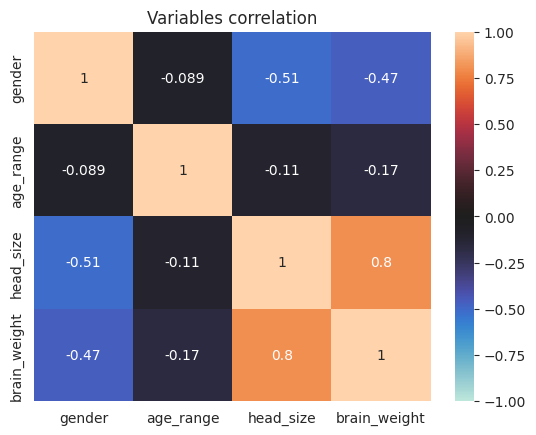

In [35]:
corr = data.corr()
plt.title("Variables correlation")
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);

With the correlation matrix we see that "Head Size" has almost an absolute correlation with "Brain Weight", while "Gender" and "Age Range", have a negative correlation with "Brain Weight"

First, we'll develop a model including these two last attributes. Later, we'lle exclude them to compare them and see which gives better performance

# **Preprocessing**

---



---



In [45]:
#Split data in X and y
X = data[['gender', 'age_range', 'head_size']]
y = data['brain_weight']

In [46]:
#Normalize data
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

# **Model creation and evaluation**

---



---



In [48]:
max_acc = 0
best_size = 0


#Since we are working with a low amount of data, we can train several times the model with different test dataset sizes, to
#see which size gives the better performance
for size in [0.15, 0.2, 0.25, 0.3, 0.35]:

  #Split the data in train and test datasets
  X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, random_state=42, test_size=size)

  #Create the linear regression model
  reg = LinearRegression().fit(X_train, y_train)

  #Evaluate accuracy of the model
  score = reg.score(X_test, y_test)

  if score > max_acc:
    max_acc = score
    best_size = size

print("The best accuracy is obtained with a test size of {} and is {}".format(best_size, '{}%'.format(round(max_acc*100, 2))))

The best accuracy is obtained with a test size of 0.15 and is 77.18%


Now we're going to repeat the preprocessing and model creation without "Gender" and "Age Range" 

In [52]:
#Split data in X and y
X = data[['head_size']]
y = data['brain_weight']

In [50]:
#Normalize data
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [51]:
max_acc = 0
best_size = 0


#Since we are working with a low amount of data, we can train several times the model with different test dataset sizes, to
#see which size gives the better performance
for size in [0.15, 0.2, 0.25, 0.3, 0.35]:

  #Split the data in train and test datasets
  X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, random_state=42, test_size=size)

  #Create the linear regression model
  reg = LinearRegression().fit(X_train, y_train)

  #Evaluate accuracy of the model
  score = reg.score(X_test, y_test)

  if score > max_acc:
    max_acc = score
    best_size = size

print("The best accuracy is obtained with a test size of {} and is {}".format(best_size, '{}%'.format(round(max_acc*100, 2))))

The best accuracy is obtained with a test size of 0.15 and is 75.44%


Comparing both models, even though "Gender" and "Age Range" have a negative correlation with "Brain weight", including them in the model increases the model accuracy

Note: in the following cells, I've done a couple more tests, excluding "Gender" or "Age Range" individually, the code is the same but the difference is in which column is being exluded

In [57]:
#Split data in X and y
X = data[['gender', 'head_size']]
y = data['brain_weight']

#Normalize data
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

max_acc = 0
best_size = 0


#Since we are working with a low amount of data, we can train several times the model with different test dataset sizes, to
#see which size gives the better performance
for size in [0.15, 0.2, 0.25, 0.3, 0.35]:

  #Split the data in train and test datasets
  X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, random_state=42, test_size=size)

  #Create the linear regression model
  reg = LinearRegression().fit(X_train, y_train)

  #Evaluate accuracy of the model
  score = reg.score(X_test, y_test)

  if score > max_acc:
    max_acc = score
    best_size = size

print("The best accuracy is obtained with a test size of {} and is {}".format(best_size, '{}%'.format(round(max_acc*100, 2))))

The best accuracy is obtained with a test size of 0.15 and is 76.11%


In [56]:
#Split data in X and y
X = data[['age_range', 'head_size']]
y = data['brain_weight']

#Normalize data
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

max_acc = 0
best_size = 0


#Since we are working with a low amount of data, we can train several times the model with different test dataset sizes, to
#see which size gives the better performance
for size in [0.15, 0.2, 0.25, 0.3, 0.35]:

  #Split the data in train and test datasets
  X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, random_state=42, test_size=size)

  #Create the linear regression model
  reg = LinearRegression().fit(X_train, y_train)

  #Evaluate accuracy of the model
  score = reg.score(X_test, y_test)

  if score > max_acc:
    max_acc = score
    best_size = size

print("The best accuracy is obtained with a test size of {} and is {}".format(best_size, '{}%'.format(round(max_acc*100, 2))))

The best accuracy is obtained with a test size of 0.15 and is 76.29%


In conclusion I believe that the main reason why the models have a low accuracy is due to the low amount of data in the dataset. If it had thousands of rows probably the accuracy would increase

A secondary reason can be the low amount of attributes